In [57]:
#copied from 1.09 end to end.

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [58]:
#put r in the beginning, 2. backslashes 3. 1 forward slash, utf-8 coding problem -> change encoding with latin1 type
df1=pd.read_csv(r'C:/Users/ilike/1.data/MiniProject/attacks.csv',encoding='latin1')

In [59]:
#standardizing title, make the copy of df1
df1.columns=df1.columns.str.lower().str.replace(" ","")
df2=df1.copy()

# checking NA values and data trim 

In [60]:
df2.isna().sum()

casenumber              17021
date                    19421
year                    19423
type                    19425
country                 19471
area                    19876
location                19961
activity                19965
name                    19631
sex                     19986
age                     22252
injury                  19449
fatal(y/n)              19960
time                    22775
species                 22259
investigatororsource    19438
pdf                     19421
hrefformula             19422
href                    19421
casenumber.1            19421
casenumber.2            19421
originalorder           19414
unnamed:22              25722
unnamed:23              25721
dtype: int64

In [61]:
#remove rows if all rows are NA value(no infomation)
df2=df2.dropna(how='all')
df2

,casenumber,date,year,type,country,area,location,activity,name,sex,...,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df2.columns

Index(['casenumber', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal(y/n)', 'time',
       'species', 'investigatororsource', 'pdf', 'hrefformula', 'href',
       'casenumber.1', 'casenumber.2', 'originalorder', 'unnamed:22',
       'unnamed:23'],
      dtype='object')

In [63]:
#dropping if casenumbers are same
df2=df2.drop_duplicates(subset=['casenumber.1'])
#drop unecessary columns
df2=df2.drop(['name','investigatororsource','pdf','hrefformula','href',"casenumber.1","casenumber.2",'originalorder',"unnamed:22","unnamed:23"], axis=1)
df2

,casenumber,date,year,type,country,area,location,activity,sex,age,injury,fatal(y/n),time,species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,NaN,FATAL,Y,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,FATAL,Y,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,NaN,FATAL,Y,NaN,NaN
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN


In [64]:
#put "FATAL" in fatal(y/n) columns if injury column startswith FATAL
df2.loc[(df2['fatal(y/n)'].isna())&(df2['injury'].str.startswith('FATAL')),'fatal(y/n)']='FATAL'

In [65]:
#check what kind of values are in fatal(y/n)
df2['fatal(y/n)'].value_counts()

N          4284
Y          1384
UNKNOWN      71
FATAL        35
 N            7
M             1
2017          1
N             1
y             1
Name: fatal(y/n), dtype: int64

In [66]:
#drop casenumber, injury column
df2=df2.drop(['casenumber','injury'],axis=1)
df2=df2.drop(columns=['species'])
df2

,date,year,type,country,area,location,activity,sex,age,fatal(y/n),time
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,N,18h00
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,N,14h00 -15h00
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,N,07h45
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,N,NaN
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,NaN,Y,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,Y,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,NaN,Y,NaN
6301,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,M,15,Y,NaN


In [67]:
#drop if fatal(y/n) value is unknown or number, make all values only with Y/N
df2=df2.drop(df2[df2['fatal(y/n)']=="UNKNOWN"].index)
df2['fatal(y/n)']=df2['fatal(y/n)'].replace(['FATAL','y'],'Y')
df2['fatal(y/n)']=df2['fatal(y/n)'].replace([' N','N '],'N')
#drop if fatal is not N or Y 
df2=df2[df2['fatal(y/n)'].isin(['N','Y'])]
df2['fatal(y/n)'].value_counts()

N    4292
Y    1420
Name: fatal(y/n), dtype: int64

In [68]:
#rename my key column 'fatal'
df2=df2.rename(columns={'fatal(y/n)':'fatal'})
df2

,date,year,type,country,area,location,activity,sex,age,fatal,time
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,N,18h00
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,N,14h00 -15h00
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,N,07h45
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,N,NaN
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,NaN,Y,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,NaN,Y,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,Y,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,NaN,Y,NaN


In [69]:
df2.isna().sum()

date           0
year           1
type           3
country       45
area         402
location     477
activity     388
sex          457
age         2473
fatal          0
time        2918
dtype: int64

<AxesSubplot:xlabel='fatal', ylabel='count'>

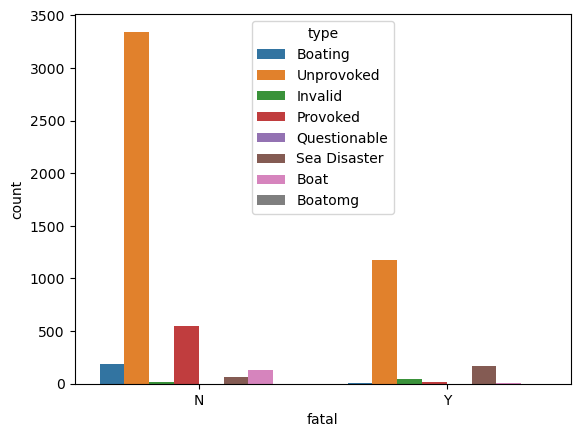

In [70]:
#still some data is empty but fatal or not is trimmed So I will first start charting.
sns.countplot(data=df2, x='fatal', hue='type')

<AxesSubplot:xlabel='fatal', ylabel='count'>

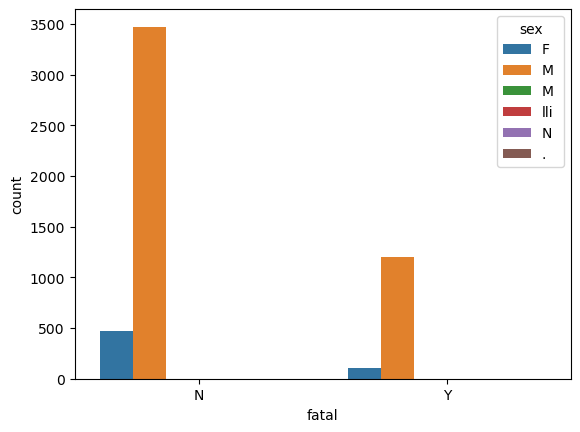

In [71]:
sns.countplot(data=df2, x='fatal', hue='sex')

<AxesSubplot:xlabel='count', ylabel='sex'>

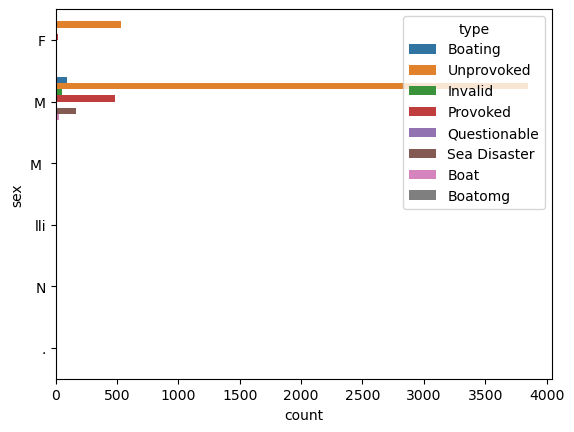

In [72]:
sns.countplot(data=df2, y='sex', hue='type')

In [73]:
df2['date'].unique()

array(['25-Jun-2018', '18-Jun-2018', '09-Jun-2018', ..., '1900-1905',
       '1883-1889', '1845-1853'], dtype=object)

In [74]:
df2

,date,year,type,country,area,location,activity,sex,age,fatal,time
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,N,18h00
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,N,14h00 -15h00
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,N,07h45
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,N,NaN
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,NaN,Y,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,NaN,Y,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,Y,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,NaN,Y,NaN


In [75]:
#check what kind of values are in fatal(y/n)
df2['location'].value_counts()

New Smyrna Beach, Volusia County               159
Daytona Beach, Volusia County                   30
Ponce Inlet, Volusia County                     20
Melbourne Beach, Brevard County                 17
Myrtle Beach, Horry County                      16
                                              ... 
Sebastian Inlet, Indian River County             1
The Rocks, Hutchinson Island, Martin County      1
Kowie River                                      1
Yoff Island                                      1
Below the English fort, Trincomalee              1
Name: location, Length: 3771, dtype: int64

In [76]:
#found there are still too many unwanted complexities in columns I'd like to start small with df3
df3=df2.copy()

In [77]:
df3=df3.drop(['date','year','area','location'],axis=1)

In [78]:
#more data cleaning of df3, I will fill age with average value.
df3

,type,country,activity,sex,age,fatal,time
0,Boating,USA,Paddling,F,57,N,18h00
1,Unprovoked,USA,Standing,F,11,N,14h00 -15h00
2,Invalid,USA,Surfing,M,48,N,07h45
3,Unprovoked,AUSTRALIA,Surfing,M,NaN,N,NaN
4,Provoked,MEXICO,Free diving,M,NaN,N,NaN
...,...,...,...,...,...,...,...
6297,Unprovoked,AUSTRALIA,Diving,M,NaN,Y,NaN
6298,Unprovoked,AUSTRALIA,Pearl diving,M,NaN,Y,NaN
6299,Unprovoked,USA,Swimming,M,NaN,Y,NaN
6300,Unprovoked,PANAMA,NaN,M,NaN,Y,NaN


In [79]:
#more data cleaning of df3, I will fill age with average value.
print(df3['age'].isna().sum())
print()
print()
print(df3['age'].value_counts())
print()
print()
print(df3.dtypes)

2473


18          142
17          138
15          137
16          135
19          135
           ... 
20            1
>50           1
18 to 22      1
adult         1
13 or 14      1
Name: age, Length: 148, dtype: int64


type        object
country     object
activity    object
sex         object
age         object
fatal       object
time        object
dtype: object


In [80]:
#change age column to float type in order to get avrage age and fillna
#use regex to find 
df3['age'] = df3['age'].apply(lambda x: re.sub('[^0-9]','',str(x)))
df3['age'] = pd.to_numeric(df3['age'], errors='coerce')
df3['age'].isna().sum()

2502

In [81]:
#unfortunately there must be lots of wrong data left due to descriptive contents, such as 30~40s etc. I need to see only valid values 
print(df3['age'].value_counts().sort_values(ascending=False))

18.0      143
20.0      141
17.0      138
15.0      137
16.0      135
         ... 
1716.0      1
810.0       1
910.0       1
3623.0      1
1314.0      1
Name: age, Length: 108, dtype: int64


In [82]:
#get the average age only between 0-100, using loc accessor
#df3['age'] = df3['age'].astype(float)
#turns out age fillNa with average value is not pretty just remove outliars

average_age=df3.loc[df3['age'].between(0,90)].mean().age
print(average_age)
print("IS NA value of 'age' column : "+str(df3['age'].isna().sum()))
print(df3['age'].value_counts().sort_values(ascending=False))
#assign average age 27.9 if age column has outside value than 0-100
#df3.loc[~df3['age'].between(0,100),'age']=average_age
#df3['age'].fillna(average_age, inplace=True)


27.315938384155928
IS NA value of 'age' column : 2502
18.0      143
20.0      141
17.0      138
15.0      137
16.0      135
         ... 
1716.0      1
810.0       1
910.0       1
3623.0      1
1314.0      1
Name: age, Length: 108, dtype: int64


In [84]:
#use loc indexting to df.loc[boolean_condiiton,'column_name'] = value to change(assign) value I want
df3.loc[~df3['age'].between(0,100),'age']=average_age
average_age

27.315938384155928

<AxesSubplot:xlabel='fatal', ylabel='count'>

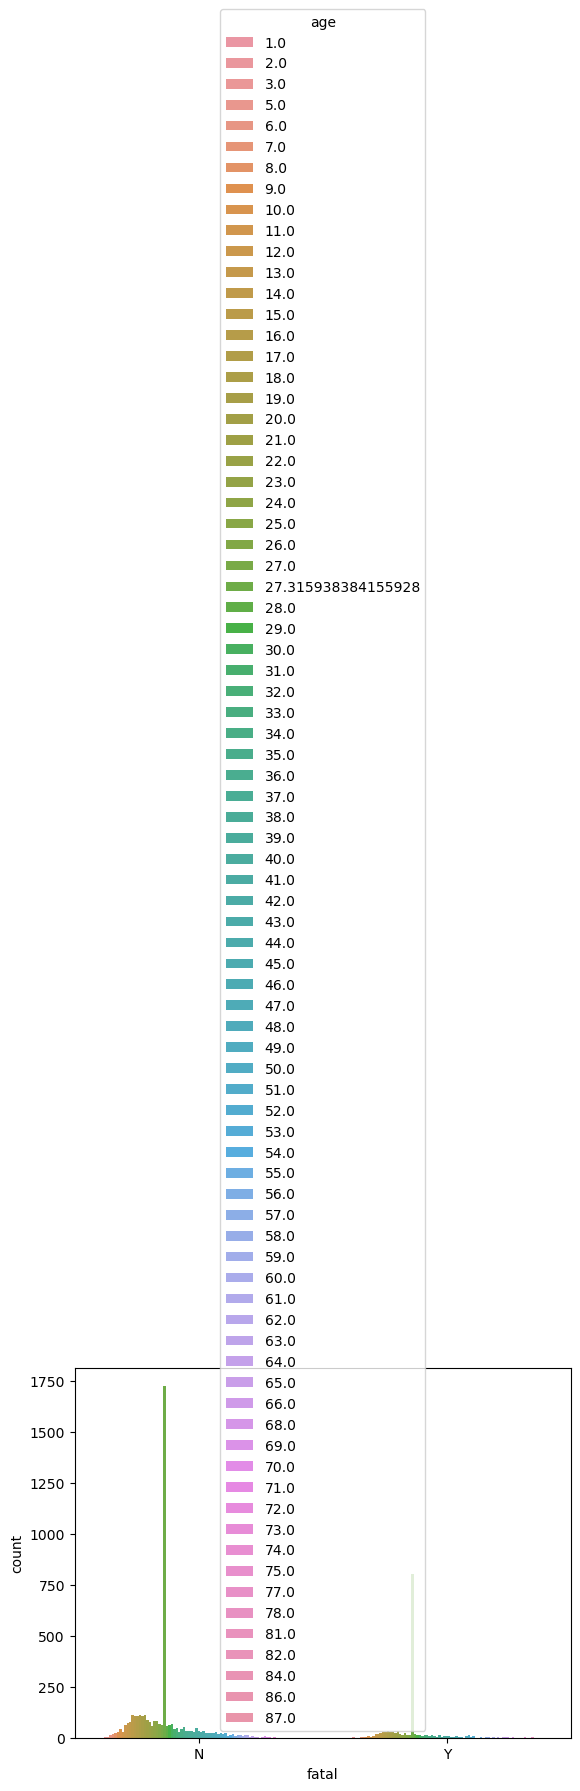

In [85]:
sns.countplot(data=df3, x='fatal', hue='age')
#average age is too much sticking out - exclude that specific age and look into a data plot

In [86]:
#filter out average_age and make a new dataframe df3_age
df3_age=df3[df3['age']!=average_age]
df3_age

,type,country,activity,sex,age,fatal,time
0,Boating,USA,Paddling,F,57.0,N,18h00
1,Unprovoked,USA,Standing,F,11.0,N,14h00 -15h00
2,Invalid,USA,Surfing,M,48.0,N,07h45
6,Unprovoked,BRAZIL,Swimming,M,18.0,Y,Late afternoon
7,Unprovoked,USA,Fishing,M,52.0,N,NaN
...,...,...,...,...,...,...,...
6242,Unprovoked,IRAQ,Swimming naked near a date palm where many dat...,M,6.0,N,Afternoon
6243,Unprovoked,IRAQ,Swimming in section of river used for washing ...,M,16.0,N,Afternoon
6254,Provoked,CUBA,"Shark fishing, knocked overboard",M,50.0,Y,NaN
6276,Unprovoked,BELIZE,Standing,M,16.0,Y,NaN


In [ ]:
#I want to make a graph witch overlayes each other to find corelation with age and fatal attacks Y / N
#creating Fatal N dataframe

In [87]:
df3_ageF=df3_age[df3_age['fatal']=='Y']
df3_ageF

,type,country,activity,sex,age,fatal,time
6,Unprovoked,BRAZIL,Swimming,M,18.0,Y,Late afternoon
58,Unprovoked,COSTA RICA,Scuba diving,F,49.0,Y,NaN
64,Unprovoked,CUBA,Night bathing,M,22.0,Y,23h30
76,Invalid,SOUTH AFRICA,Scuba Diving,M,31.0,Y,NaN
84,Invalid,SOUTH AFRICA,Scuba Diving,M,25.0,Y,Afternoon
...,...,...,...,...,...,...,...
6114,Unprovoked,SRI LANKA,Swimming,M,22.0,Y,Evening
6184,Unprovoked,PANAMA,Swimming/,M,20.0,Y,NaN
6254,Provoked,CUBA,"Shark fishing, knocked overboard",M,50.0,Y,NaN
6276,Unprovoked,BELIZE,Standing,M,16.0,Y,NaN


In [88]:
df3_ageN=df3_age[df3_age['fatal']=='N']
df3_ageN

,type,country,activity,sex,age,fatal,time
0,Boating,USA,Paddling,F,57.0,N,18h00
1,Unprovoked,USA,Standing,F,11.0,N,14h00 -15h00
2,Invalid,USA,Surfing,M,48.0,N,07h45
7,Unprovoked,USA,Fishing,M,52.0,N,NaN
8,Unprovoked,USA,Walking,M,15.0,N,17h00
...,...,...,...,...,...,...,...
6238,Unprovoked,FIJI,Spearfishing,M,27.0,N,NaN
6239,Unprovoked,MOZAMBIQUE,Skindiving,M,36.0,N,NaN
6241,Unprovoked,IRAQ,Fishing from a small boat & put his hand in th...,M,25.0,N,Afternoon
6242,Unprovoked,IRAQ,Swimming naked near a date palm where many dat...,M,6.0,N,Afternoon


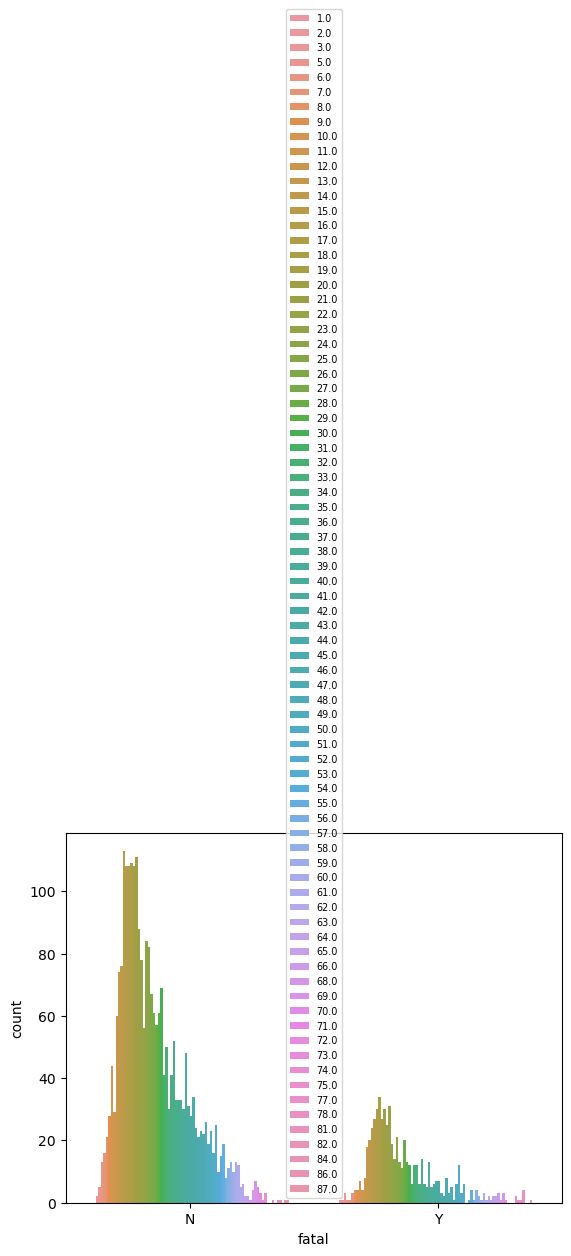

<Figure size 2000x1600 with 0 Axes>

In [89]:
#plot a new graph with sorted df3_age dataframe
sns.countplot(data=df3_age,x='fatal',hue='age')
plt.legend(fontsize='x-small')
plt.figure(figsize=(20, 16))
plt.show()

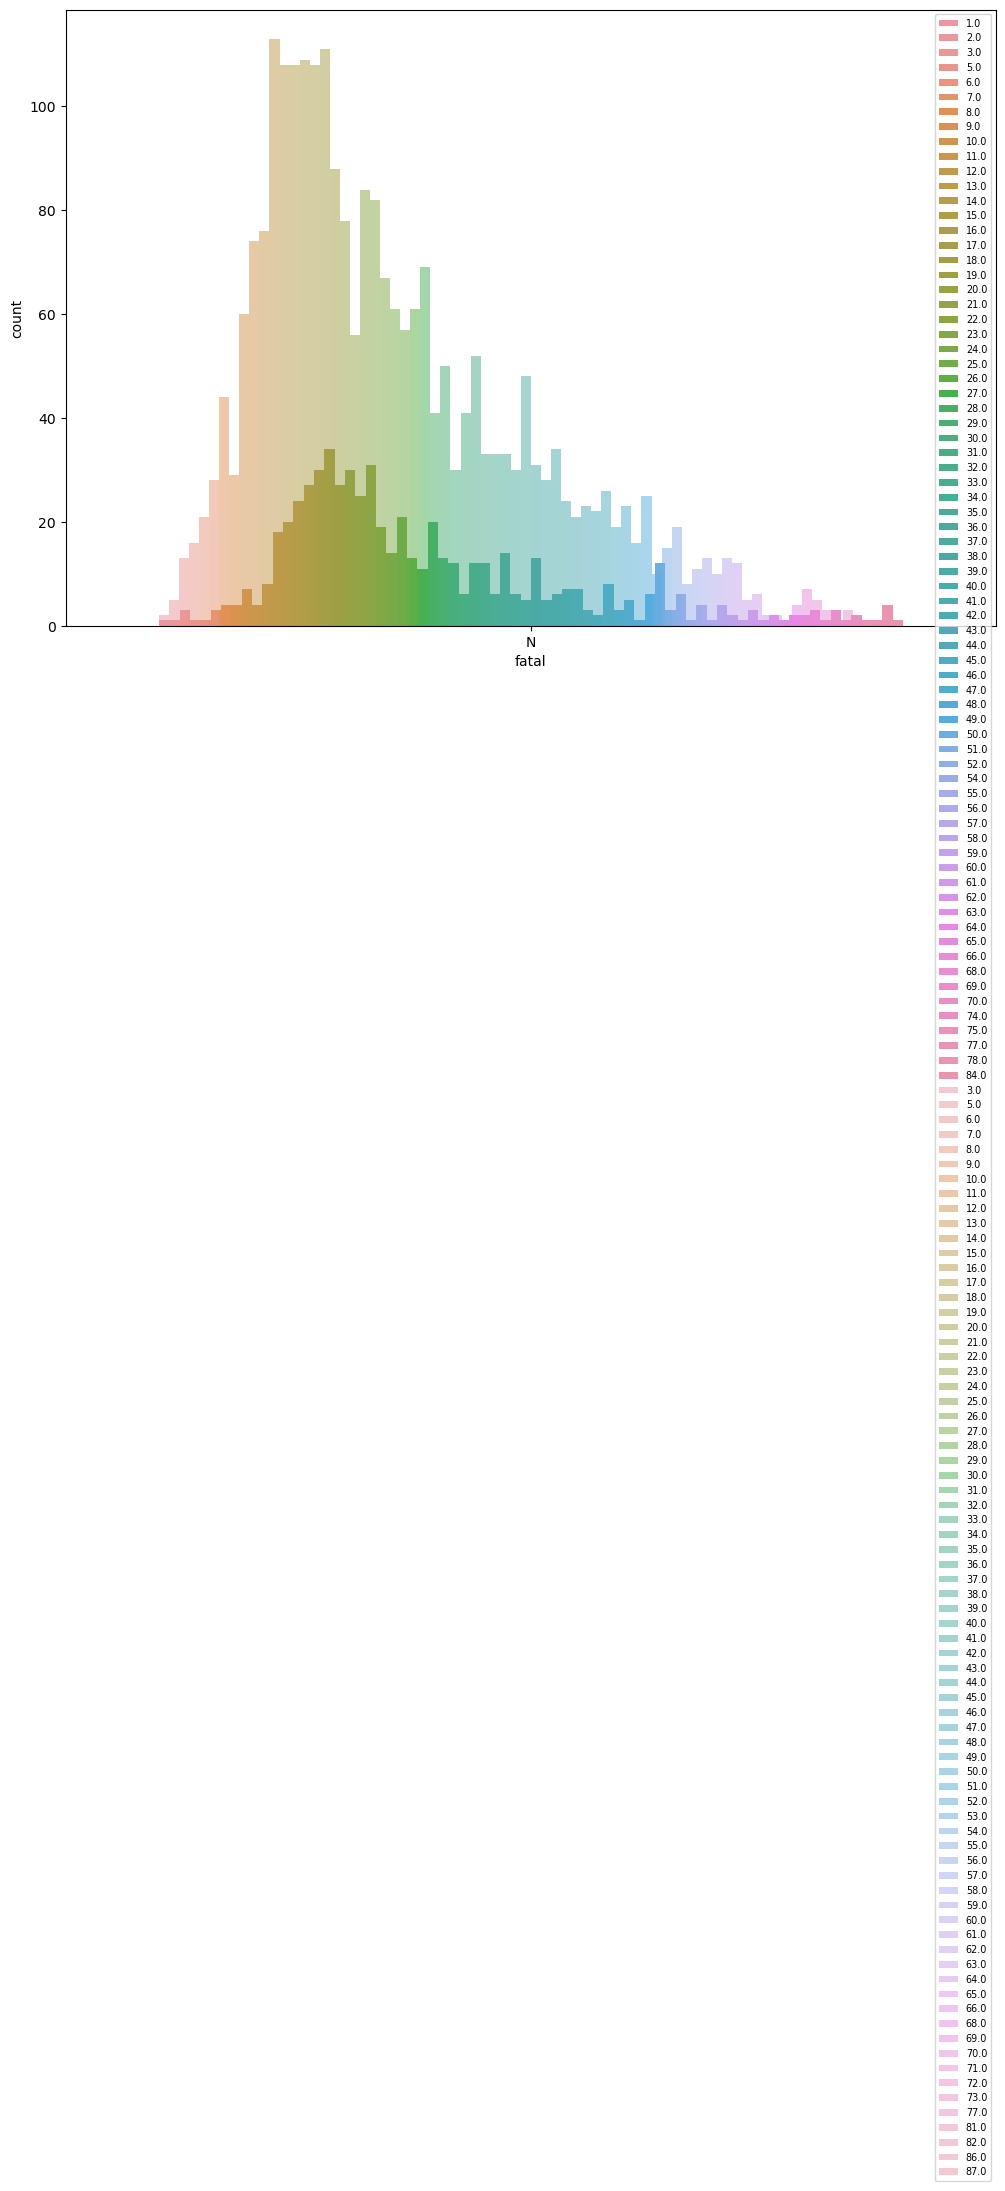

In [90]:
#I'd like to create a overllaped graphs to compare two groups
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df3_ageF, x='fatal',hue='age')
sns.countplot(data=df3_ageN, x='fatal',hue='age', ax=ax, alpha=0.5)
plt.legend(fontsize='x-small')
plt.show()

In [91]:
df4=df3.copy()

In [92]:
'''for index, row in df4.iterrows():
    activity = row["Activity"]
    if isinstance(activity, str) and any(word in activity.upper() for word in ["SURF", "SURFING"]):
        df4.at[index, "Activity"] = "Surfing"
    elif isinstance(activity, str) and any(word in activity.upper() for word in ["SWIM", "SWIMMING", "BATHING"]):
        df4.at[index, "Activity"] = "Swimming"
    elif isinstance(activity, str) and any(word in activity.upper() for word in ["DIVING", "DIVE", "SCUBA", "SNORKELING"]):
        df4.at[index, "Activity"] = "Diving"
    elif isinstance(activity, str) and any(word in activity.upper() for word in ["FISH", "FISHING", "SPEARFISHING", "WADE-FISHING"]):
        df4.at[index, "Activity"] = "Fishing"
    elif isinstance(activity, str) and any(word in activity.upper() for word in ["SAILING", "SAIL", "BOAT", "BOATING"]):
        df4.at[index, "Activity"] = "Boating"
    elif isinstance(activity, str) and any(word in activity.upper() for word in ["SURFING", "SURF", "BOARD", "PADDLE", "WINDSURF", "SURF
'''

'for index, row in df4.iterrows():\n    activity = row["Activity"]\n    if isinstance(activity, str) and any(word in activity.upper() for word in ["SURF", "SURFING"]):\n        df4.at[index, "Activity"] = "Surfing"\n    elif isinstance(activity, str) and any(word in activity.upper() for word in ["SWIM", "SWIMMING", "BATHING"]):\n        df4.at[index, "Activity"] = "Swimming"\n    elif isinstance(activity, str) and any(word in activity.upper() for word in ["DIVING", "DIVE", "SCUBA", "SNORKELING"]):\n        df4.at[index, "Activity"] = "Diving"\n    elif isinstance(activity, str) and any(word in activity.upper() for word in ["FISH", "FISHING", "SPEARFISHING", "WADE-FISHING"]):\n        df4.at[index, "Activity"] = "Fishing"\n    elif isinstance(activity, str) and any(word in activity.upper() for word in ["SAILING", "SAIL", "BOAT", "BOATING"]):\n        df4.at[index, "Activity"] = "Boating"\n    elif isinstance(activity, str) and any(word in activity.upper() for word in ["SURFING", "SURF",

# age seems less corelated with the fatal event, I will do data cleaning of activity column this time.

How to See there are less activities than 2???

1. use index and make a new data frame?

In [259]:
# what is 1 time activities are like?
# put value_count index which counts has less than 2 numbers
activity_counts=df3['activity'].value_counts()
act_1=activity_counts[activity_counts < 2].index
act_2=df4[df4['activity'].isin(act_1)]
act_2

,type,country,activity,sex,age,fatal,time
24,Unprovoked,SOUTH AFRICA,Paddle-skiing,M,33.000000,N,09h40
41,Provoked,AUSTRALIA,Kayak fishing for sharks,M,34.000000,N,Night
55,Provoked,MALAYSIA,Fishing / Wading,M,24.000000,N,NaN
59,Sea Disaster,LIBYA,2 boats capsized,NaN,27.315938,Y,NaN
64,Unprovoked,CUBA,Night bathing,M,22.000000,Y,23h30
...,...,...,...,...,...,...,...
6281,Unprovoked,SOUTH AFRICA,Swimming in pool formed by construction of a w...,M,27.315938,Y,NaN
6284,Unprovoked,VIETNAM,Swimming around anchored ship,M,27.315938,N,NaN
6285,Unprovoked,SOUTH AFRICA,Crew swimming alongside their anchored ship,M,27.315938,Y,NaN
6286,Unprovoked,SOUTH AFRICA,4 men were bathing,M,27.315938,Y,NaN


In [256]:
filter_1

Index(['Collecting fish in military trap when bitten by captured shark that had been shot by soldiers with Garten',
       'Rescuing seaman after ship sunk by German raider',
       'Free diving for trochus shell, swimming to dinghy',
       'Free diving for trochus ', 'Swimming on sandbar adjacent to channel',
       'The troopship Britannia was sunk by the German raider Thor',
       'Swimming in hip-deep water', 'Climbing back on ship',
       'Splashing in water ',
       'Adrift on raft after their ship was sunk by an Axis raider ',
       ...
       'Dynamite fishing', 'Leaving the water',
       'Playing with a frisbee in the shallows',
       'Sinking of the ferryboat Dumaguete ', 'Feeding mullet to sharks',
       'Sight-seeing', 'Surf-fishing', 'Freediving for abalone (at surface)',
       'Scuba diving for lobsters', 'Wreck of  large double sailing canoe'],
      dtype='object', length=1220)

In [263]:
other_injuries = [ind for ind, val in df3["injury"].value_counts().iteritems()if val <6]
other_injuries


KeyError: 'injury'

**Let's first practice about iteritems() function**

In [292]:
S=pd.Series([60,40,27,43],['jim','kelly','asiguyl','Cytrus'])
S

jim        60
kelly      40
asiguyl    27
Cytrus     43
dtype: int64

In [293]:
for index, value in S.iteritems():
    print(f"hello {index}, I see your age is {value}")

hello jim, I see your age is 60
hello kelly, I see your age is 40
hello asiguyl, I see your age is 27
hello Cytrus, I see your age is 43
